In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from datasets import load_dataset
dataset = load_dataset("ar_res_reviews")
train_dataset = dataset["train"]
df = pd.DataFrame({"polarity": train_dataset["polarity"], "text": train_dataset["text"] ,
                   "restaurant_id": train_dataset["restaurant_id"] , "user_id": train_dataset["user_id"]
                   })

Generating train split:   0%|          | 0/8364 [00:00<?, ? examples/s]

Dataset ar_res_reviews downloaded and prepared to /root/.cache/huggingface/datasets/ar_res_reviews/default/0.0.0/f303714dc96c8056d45dca8950e5b7fe6ad59b88d0c095e07724e0484824031c. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df

,polarity,text,restaurant_id,user_id
0,0,اولا: المنيو تغير الشورما اصبحت اعتياديه بأختف...,296,423
1,0,من محلات الشاورما ذات الشعبيه لتميز الصلصات ال...,296,423
2,1,دجاج طازج يحضر امامك على الطلب لا يقوم باعدة ا...,5027,39580
3,1,فكما تعرف أستراليا بالكنغر والكوالا. فإنها تعر...,642,444
4,0,إسمحو لي أن أقيم مطعم هاشم بصفتي فلسطيني عشت ف...,434,2191
...,...,...,...,...
8359,1,أتمنى تعملو بطاقات خاصة أو ذهبية للعملاء الدائ...,4990,39151
8360,1,المشويات عندهم اطيب مشويات اكلتها بحياتي والاس...,4990,34712
8361,1,المطعم ممتاز للغايه ، من ناحيه تجهيزات المطعم ...,1050,2284
8362,0,جينا عندهم الساعة 10 بالليل مافى احد اتبرع يشو...,3243,4598


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   polarity       8364 non-null   int64 
 1   text           8364 non-null   object
 2   restaurant_id  8364 non-null   object
 3   user_id        8364 non-null   object
dtypes: int64(1), object(3)
memory usage: 261.5+ KB


In [ ]:
# df['text'] =df['texts']

In [ ]:
# df = df.drop('texts', axis=1)

In [5]:
# df['labels'] = df['polarity'].replace({'negative': 0, 'positive': 1})
df['labels'] = df['polarity']


<Axes: xlabel='labels', ylabel='count'>

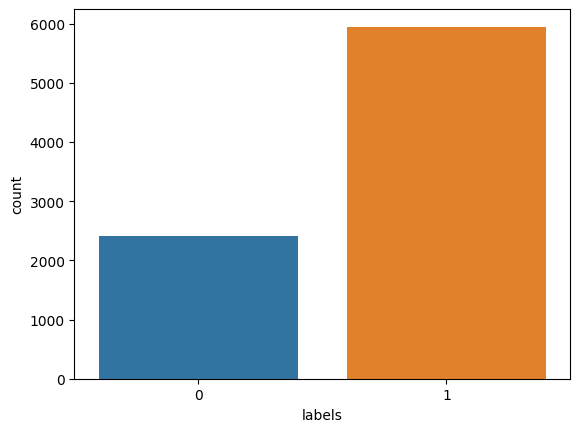

In [6]:
import seaborn as sns
sns.countplot(x=df["labels"])

In [7]:
for i in range(4100):
  if (df["labels"][i]==1):
    df.drop(i , inplace=True)

In [8]:
df['labels'] = df['labels'].replace({ 0:'negative', 1:'positive'})

<Axes: xlabel='labels', ylabel='count'>

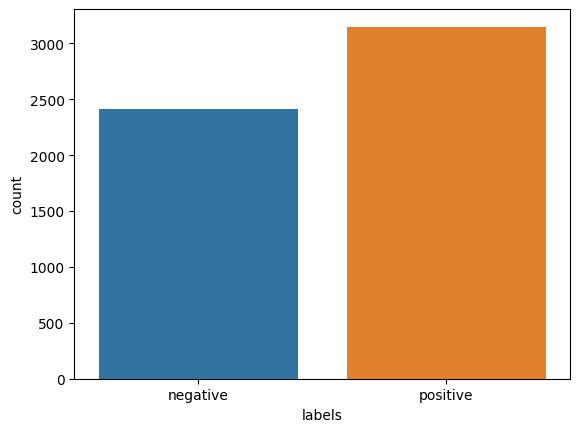

In [9]:
import seaborn as sns
sns.countplot(x=df["labels"])

In [10]:
df['labels'] = df['labels'].replace({'negative':0, 'positive':1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 8363
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   polarity       5568 non-null   int64 
 1   text           5568 non-null   object
 2   restaurant_id  5568 non-null   object
 3   user_id        5568 non-null   object
 4   labels         5568 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 390.0+ KB


In [12]:
df = df.drop('polarity', axis=1)

In [13]:
from sklearn.model_selection import train_test_split
# Split data into train and eval DataFrames
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of train_df and eval_df
print("Train DataFrame shape:", train_df.shape)
print("Eval DataFrame shape:", eval_df.shape)

Train DataFrame shape: (4454, 4)
Eval DataFrame shape: (1114, 4)


In [14]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 27.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

In [15]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

"""# Preparing train data
train_data = [
    ["Aragorn was the heir of Isildur", 1],
    ["Frodo was the heir of Isildur", 0],
    ["Pippin is stronger than Merry", 2],
]
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Preparing eval data
eval_data = [
    ["Aragorn was the heir of Elendil", 1],
    ["Sam was the heir of Isildur", 0],
    ["Merrry is stronger than Pippin", 2],
]
eval_df = pd.DataFrame(eval_data)
eval_df.columns = ["text", "labels"]"""

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=3)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'asafaya/bert-base-arabic',
    num_labels=2,
    args=model_args,
    # use_cuda= False
)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Make predictions with the model
#predictions, raw_outputs = model.predict(["Sam was a Wizard"])


Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.weight', 'classifier.

  0%|          | 0/4454 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/557 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/557 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/557 [00:00<?, ?it/s]

  0%|          | 0/1114 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/140 [00:00<?, ?it/s]

In [16]:
result

{'mcc': 0.7140836563936267,
 'tp': 528,
 'tn': 428,
 'fp': 82,
 'fn': 76,
 'auroc': 0.9277431502402285,
 'auprc': 0.9324033063835168,
 'eval_loss': 0.6894188744681222}

In [17]:
predictions, raw_outputs = model.predict(["الموت"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

array([0])

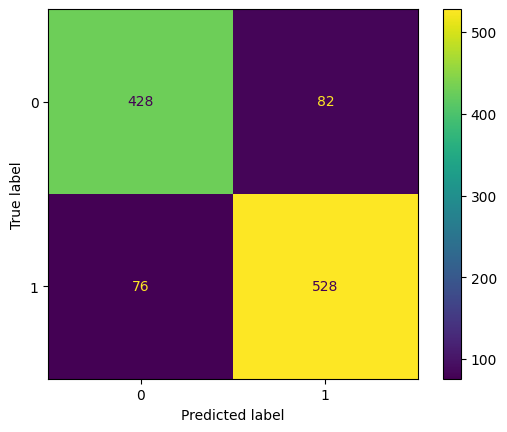

In [19]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay ,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
prediction= model_outputs.argmax(axis=1)
true_labels = eval_df['labels'].values
ConfusionMatrixDisplay.from_predictions(true_labels, prediction)
plt.show()